# WeatherPy
---

#### The majority of code in this section sourced from starter_code.ipynb.
#### Code sections written by author will be stated in comments

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Creates a list of cities using citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


### Retreives Weather Data and stores it in a CSV file

In [3]:
# Set the API base URL
# --Code written by author--
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # --Code written by author--
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # --Code written by author--
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # --Code written by author--
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yumen
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | meyungs
City not found. Skipping...
Processing Record 5 of Set 1 | saint-marc
Processing Record 6 of Set 1 | hovd
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | severo-kurilsk
Processing Record 11 of Set 1 | hervey bay
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | nishihara
Processing Record 15 of Set 1 | sao filipe
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | garden city
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | sinnamary
Processing Rec

In [4]:
# Creates dataframe of each city and sets the columns
# --Code written by author--
city_data_json_col = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
city_data_df = pd.DataFrame(city_data, columns = city_data_json_col)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yumen,40.2833,97.2000,13.04,15,99,6.64,CN,1683172976
1,arraial do cabo,-22.9661,-42.0278,22.46,82,0,1.76,BR,1683172976
2,mataura,-46.1927,168.8643,17.55,76,57,0.75,NZ,1683172977
3,saint-marc,19.1082,-72.6938,27.44,72,100,0.43,HT,1683172977
4,hovd,48.0056,91.6419,1.59,35,76,2.73,MN,1683172977


In [5]:
# Export the City_Data into a csv
city_data_df.to_csv("Data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("Data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yumen,40.2833,97.2000,13.04,15,99,6.64,CN,1683172976
1,arraial do cabo,-22.9661,-42.0278,22.46,82,0,1.76,BR,1683172976
2,mataura,-46.1927,168.8643,17.55,76,57,0.75,NZ,1683172977
3,saint-marc,19.1082,-72.6938,27.44,72,100,0.43,HT,1683172977
4,hovd,48.0056,91.6419,1.59,35,76,2.73,MN,1683172977


## Scatter Plots

#### Latitude vs Temperature

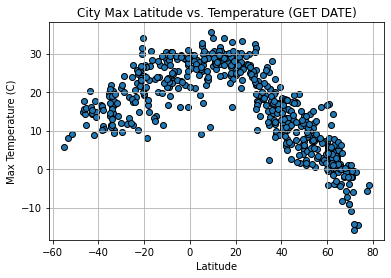

In [21]:
temperature = city_data_df["Max Temp"]
latitude = city_data_df["Lat"]
# get today's date

fig1, ax1 = plt.subplots()

ax1.scatter(latitude, temperature, edgecolors = "black") 

ax1.set_title("City Max Latitude vs. Temperature (GET DATE)")
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature (C)")
ax1.grid()

plt.show()